# NgspiceX - EKV model 2.6 with ADMS - Example

```
1.0 | 14.05.2023 | jchabloz | First draft
```

## Introduction

This notebook is simply a copy/paste of the examples provided with the Ngspice distribution that focus on using the EKV model with ADMS.

## Simulation preparation

In [1]:
from ngspicex import NgSpice
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ngx = NgSpice()

 ******
 ** ngspice-40 shared library
 ** Creation Date: Sun May 14 09:03:07 UTC 2023
 ******


## Drain voltage sweep

In [3]:
ngx.source("ekv_out.sp")

Source Deck
 Note: No compatibility mode selected!
 Circuit: epfl-ekv version 2.6 nch
 Doing analysis at TEMP = 27.000000 and TNOM = 27.000000
ng_send_init_data
 Reference value :  0.00000e+00
--ready--
--ready--
 No. of Data Rows : 2505


In [4]:
df = ngx.get_all_vectors()

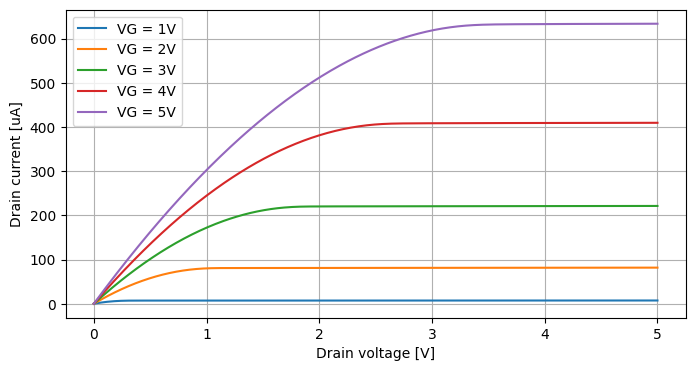

In [5]:
f, ax = plt.subplots(figsize=(8, 4))
for vg in range(1, 6):
    df_tmp = df[df['g'] == vg]
    ax.plot(df_tmp['v-sweep'], abs(df_tmp['i(vd)'])*1e6, label=f"VG = {vg}V")
ax.grid(True)
ax.legend()
ax.set_xlabel("Drain voltage [V]")
_ = ax.set_ylabel("Drain current [uA]")

## Gate voltage sweep

In [6]:
ngx.source("ekv_tran.sp")

 Note: No compatibility mode selected!
 Circuit: epfl-ekv version 2.6 nch
 Doing analysis at TEMP = 27.000000 and TNOM = 27.000000
ng_send_init_data
 Reference value :  0.00000e+00
--ready--
--ready--
 No. of Data Rows : 306


In [7]:
df = ngx.get_all_vectors()

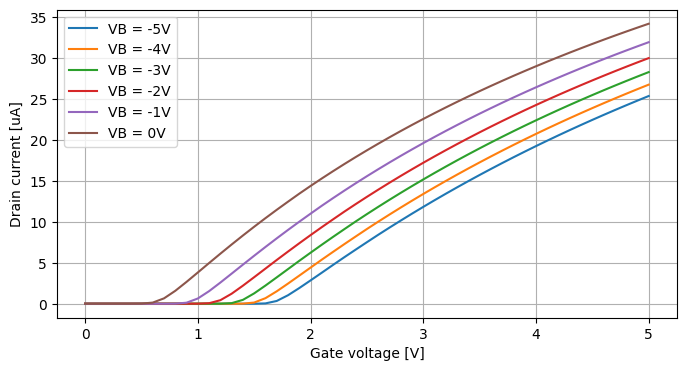

In [8]:
f, ax = plt.subplots(figsize=(8, 4))
for vb in range(-5, 1):
    df_tmp = df[df['b'] == vb]
    ax.plot(df_tmp['v-sweep'], abs(df_tmp['i(vd)'])*1e6, label=f"VB = {vb}V")
ax.grid(True)
ax.legend()
ax.set_xlabel("Gate voltage [V]")
_ = ax.set_ylabel("Drain current [uA]")